In [51]:
# Adding autoreload will let you edit your package and see the changes without restarting the notebook.

%load_ext autoreload

%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [53]:
DELIVERIES_PATH = "../data/raw/deliveries.jsonl"
SESSIONS_PATH = "../data/raw/sessions.jsonl"
USERS_PATH = "../data/raw/users.jsonl"
PRODUCTS_PATH = "../data/raw/products.jsonl"

In [54]:
def load_data(path: str) -> pd.DataFrame:
    return pd.read_json(path_or_buf=path, lines=True)


In [55]:
sns.set_style("darkgrid")  # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc("axes", labelsize=14)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=13)  # fontsize of the tick labels
plt.rc("ytick", labelsize=13)  # fontsize of the tick labels
plt.rc("legend", fontsize=13)  # legend fontsize
plt.rc("font", size=13)  # controls default text sizes

In [56]:
deliv_df = load_data(DELIVERIES_PATH)
sess_df = load_data(SESSIONS_PATH)
usr_df = load_data(USERS_PATH)
prod_df = load_data(PRODUCTS_PATH)

In [57]:
dfs = [deliv_df, usr_df, sess_df, prod_df]
for df in dfs:
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5182 entries, 0 to 5181
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   purchase_id         5182 non-null   int64  
 1   purchase_timestamp  5182 non-null   object 
 2   delivery_timestamp  4929 non-null   object 
 3   delivery_company    4928 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 162.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37246 entries, 0 to 37245
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype      

In [58]:
sess_df[["offered_discount"]].describe().style.format(precision=1, thousands=" ")

,offered_discount
count,37 246.0
mean,10.1
std,7.1
min,0.0
25%,5.0
50%,10.0
75%,15.0
max,20.0


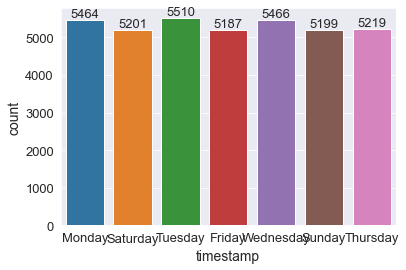

In [59]:
ax = sns.countplot(x=sess_df.timestamp.dt.day_name());
ax.bar_label(ax.containers[0]);

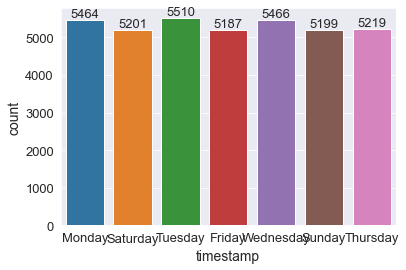

In [60]:
ax = sns.countplot(x=sess_df.timestamp.dt.day_name());
ax.bar_label(ax.containers[0]);

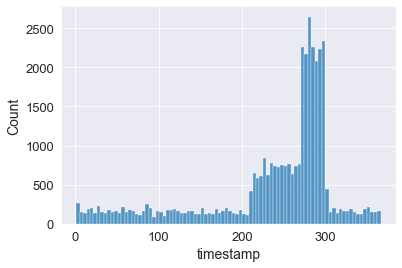

In [61]:
sns.histplot(x=sess_df.timestamp.dt.day_of_year);

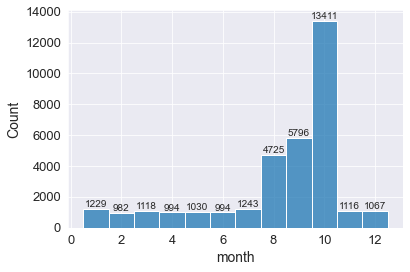

In [78]:
ax = sns.histplot(x=sess_df.timestamp.dt.month, discrete=True);
ax.bar_label(ax.containers[0])
plt.xlabel("month")
plt.rc("font", size=10)

In [84]:
prod_df[["price"]].describe().style.format(precision=1, thousands=" ")

,price
count,319.0
mean,9 917 250.9
std,116 983 466.8
min,-380.9
25%,23.4
50%,40.9
75%,101.4
max,2 065 000 000.0


In [119]:
prod_df[prod_df.price.ge(5000)].reset_index().style.format(precision=1, thousands=" ")

,index,product_id,product_name,category_path,price
0,2,1 003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,7 639.0
1,10,1 011,BioShock Infinite (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,139 990 000.0
2,19,1 020,Dead Space 2 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,89 000 000.0
3,25,1 026,Red Dead Redemption (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,139 990 000.0
4,42,1 043,Fight Night Champion (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,109 000 000.0
5,56,1 057,Doom 3 (PC),Gry i konsole;Gry komputerowe,19 990 000.0
6,65,1 066,LCD Iiyama T1931SR,Komputery;Monitory;Monitory LCD,2 065 000 000.0
7,77,1 078,Kyocera FS-3540MFP,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,5 126.0
8,79,1 080,Kyocera FS-3140MFP,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,5 301.9
9,80,1 081,OKI B840dn,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,5 259.0


In [128]:
prod_df[prod_df.price.le(0)].reset_index().style.format(precision=1, thousands=" ")
prod_df.price

0        58.97
1      2048.50
2      7639.00
3        49.99
4        49.99
        ...   
314      54.99
315    -249.00
316    1303.96
317     553.00
318      14.99
Name: price, Length: 319, dtype: float64

<AxesSubplot:xlabel='price'>

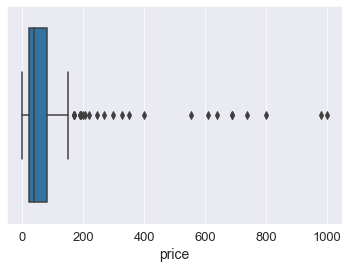

In [141]:
x = prod_df[prod_df.price.gt(0) & prod_df.price.le(1000)]
sns.boxplot(x=x.price)

In [63]:

sess_df.dropna(subset=["user_id"], inplace=True)
sess_df.user_id = sess_df.user_id.astype(int)
sess_df


,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-08-30 18:06:31,102,1001.0,VIEW_PRODUCT,0,NaN
1,100002,2021-08-28 04:15:09,102,1037.0,VIEW_PRODUCT,20,NaN
2,100003,2021-08-24 16:20:45,102,1035.0,VIEW_PRODUCT,15,NaN
3,100003,2021-08-24 16:24:51,102,1067.0,VIEW_PRODUCT,15,NaN
4,100004,2021-10-22 00:50:51,102,1283.0,VIEW_PRODUCT,5,NaN
...,...,...,...,...,...,...,...
37241,110416,2021-09-05 17:32:12,301,1277.0,VIEW_PRODUCT,10,NaN
37242,110416,2021-09-05 17:33:30,301,1276.0,VIEW_PRODUCT,10,NaN
37243,110416,2021-09-05 17:36:21,301,1276.0,BUY_PRODUCT,10,25181.0
37244,110417,2021-07-30 11:52:43,301,1318.0,VIEW_PRODUCT,5,NaN


In [64]:
sess_df.product_id = sess_df.product_id.astype(pd.Int64Dtype())
sess_df.dropna(subset=["product_id"], inplace=True)
merged = sess_df.merge(prod_df).merge(usr_df)
merged

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,product_name,category_path,price,name,city,street
0,100001,2021-08-30 18:06:31,102,1001,VIEW_PRODUCT,0,NaN,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97,Inga Jeka,Gdynia,plac Wspólna 05
1,100034,2021-08-21 13:26:04,102,1001,VIEW_PRODUCT,5,NaN,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97,Inga Jeka,Gdynia,plac Wspólna 05
2,100052,2021-10-15 20:57:04,102,1001,VIEW_PRODUCT,15,NaN,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97,Inga Jeka,Gdynia,plac Wspólna 05
3,100062,2021-09-13 15:24:06,102,1001,VIEW_PRODUCT,15,NaN,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97,Inga Jeka,Gdynia,plac Wspólna 05
4,100062,2021-09-13 15:24:42,102,1001,BUY_PRODUCT,15,20026.0,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97,Inga Jeka,Gdynia,plac Wspólna 05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33700,106758,2021-10-25 19:20:30,230,1004,VIEW_PRODUCT,10,NaN,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99,Aleksander Bartel,Kraków,plac Orzechowa 82
33701,106758,2021-10-25 19:07:53,230,1009,VIEW_PRODUCT,10,NaN,Kinect Joy Ride (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,69.00,Aleksander Bartel,Kraków,plac Orzechowa 82
33702,106758,2021-10-25 19:28:47,230,1007,VIEW_PRODUCT,10,NaN,Dead Space 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,89.99,Aleksander Bartel,Kraków,plac Orzechowa 82
33703,106758,2021-10-25 19:07:23,230,1010,VIEW_PRODUCT,10,NaN,BioShock 2 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,89.99,Aleksander Bartel,Kraków,plac Orzechowa 82


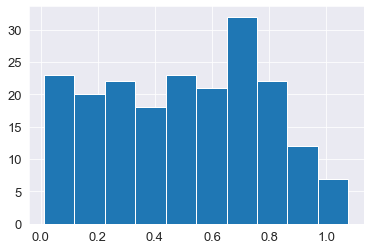

In [65]:
(merged.user_id.value_counts()/sum(merged.user_id.value_counts())*100).hist();

<AxesSubplot:>

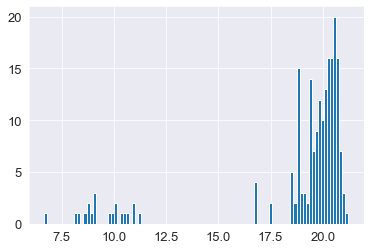

In [142]:

customers = merged[["user_id", "price"]].groupby("user_id").sum().rename(columns={"price":"amount"}).reset_index()

ref_date = merged.timestamp.max()
ref_date = ref_date + timedelta(days=1)
merged["days_since_last_purchase"] = ref_date - merged.timestamp
merged["days_since_last_purchase"] = merged["days_since_last_purchase"].astype('timedelta64[D]')

rec = merged.groupby("user_id").min().reset_index()[["user_id","days_since_last_purchase"]]
customers = customers.merge(rec)
customers.rename(columns={"days_since_last_purchase":"recency"}, inplace=True)
# customers.recency.hist(bins=50);
freq = merged[["user_id", "price"]].groupby("user_id").count().reset_index()
freq.rename(columns={"price":"frequency"}, inplace=True)
customers = customers.merge(freq)
customers.amount.apply(math.log).hist(bins=100)



In [67]:
usr_df["is_male"] = usr_df.name.apply(lambda name_str: int(name_str.split()[0][-1]!="a"))
customers = customers.merge(usr_df[["user_id","is_male"]])
#TODO tu jest strata dwóch wierszy bo pewnie nie jest zdefiniowana płeć dla nich

In [68]:
merged[["user_id", "event_type"]].groupby("user_id")
x = merged[["user_id", "event_type"]].value_counts().reset_index(name="counts")
viewed = x[x.event_type == "VIEW_PRODUCT"][["counts", "user_id"]]
bought = x[x.event_type == "BUY_PRODUCT"][["counts", "user_id"]]


In [69]:
customers = customers.merge(viewed).rename(columns={"counts":"viewed_num"})
customers = customers.merge(bought).rename(columns={"counts":"bought_num"})



In [70]:
customers["bought/sum"] = customers.bought_num/(customers.viewed_num+customers.bought_num)

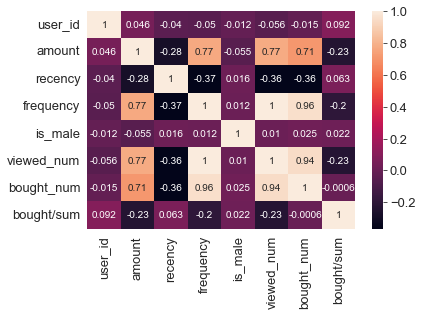

In [71]:
sns.heatmap(customers.corr(),annot=True);

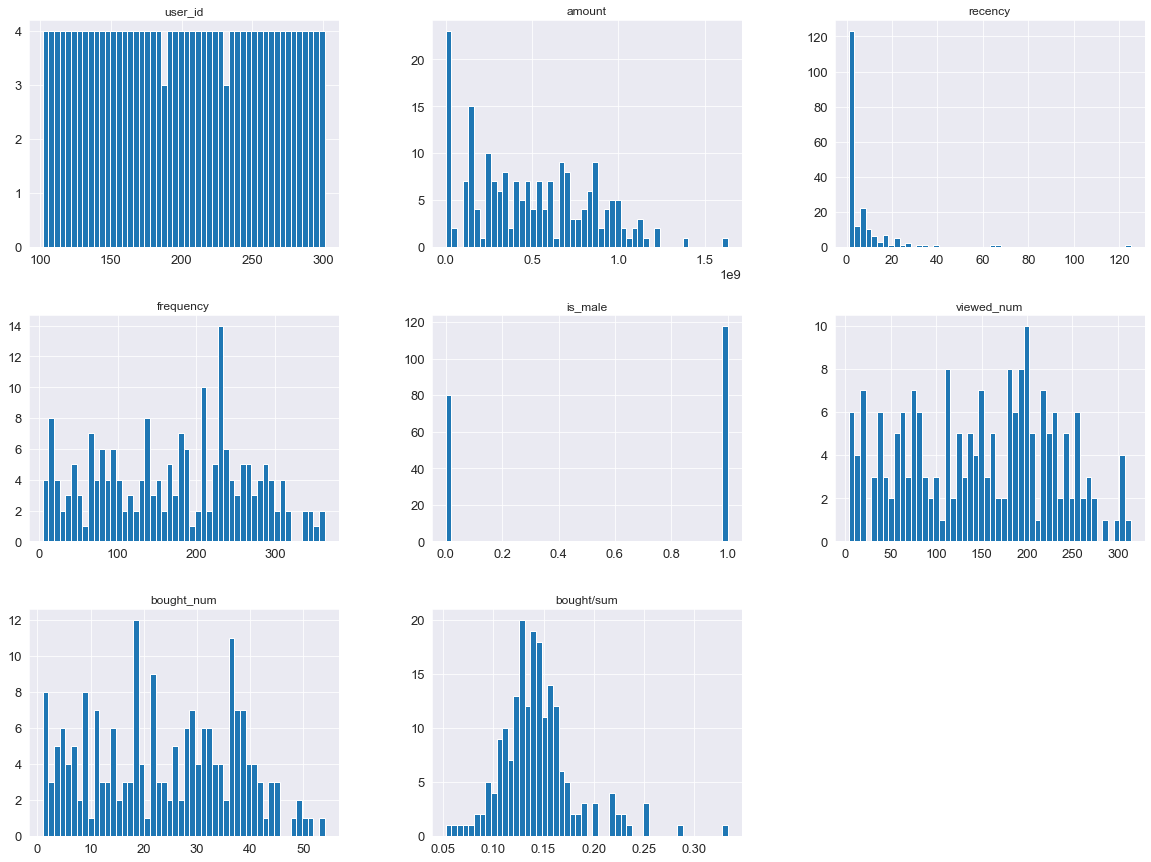

In [72]:
customers.hist(figsize=(20,15),bins=50);

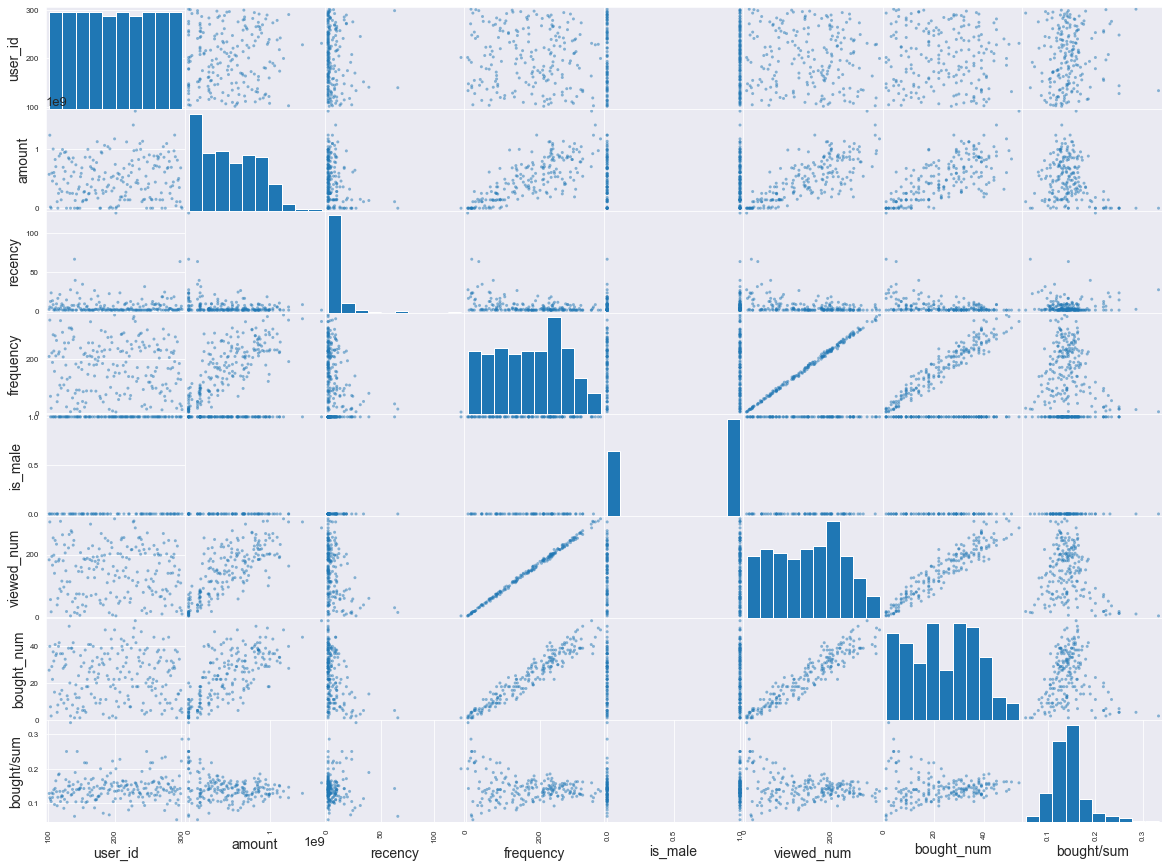

In [73]:
from pandas.plotting import scatter_matrix

scatter_matrix(customers, figsize=(20, 15));


In [74]:
#TODO usunac is_male z powyzszego wykresu